# Vaex

### ejemplo: https://towardsdatascience.com/how-to-process-a-dataframe-with-billions-of-rows-in-seconds-c8212580f447

### Creamos dataframe de 1 millón de filas y 1000 columnas

In [1]:
import vaex
import pandas as pd
import numpy as np

n_rows = 1000000
n_cols = 1000
df = pd.DataFrame(np.random.randint(0, 100, size=(n_rows, n_cols)), columns=['col%d' % i for i in range(n_cols)])
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999
0,85,51,83,0,83,82,93,71,63,20,...,86,25,41,37,96,38,94,43,28,71
1,38,21,54,40,67,88,7,23,97,79,...,89,6,0,55,81,26,71,21,52,77
2,3,47,54,7,1,50,77,16,40,80,...,44,23,62,80,6,97,22,4,97,92
3,80,24,73,82,15,47,94,86,29,0,...,99,59,90,0,66,11,19,17,9,44
4,37,93,50,58,49,58,87,59,19,75,...,96,15,71,42,86,31,84,66,37,20


In [2]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 1000 entries, col0 to col999
dtypes: int32(1000)
memory usage: 3.7 GB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 1000 entries, col0 to col999
dtypes: int32(1000)
memory usage: 3.7 GB


In [4]:
file_path = './data/big_file.csv'
df.to_csv(file_path, index=False)

In [6]:
len(df)

1000000

We need to convert the CSV to HDF5 (the Hierarchical Data Format version 5) to see the benefit with Vaex. Vaex has a function for conversion, which even supports files bigger than the main memory by converting smaller chunks.

In [7]:
dv = vaex.from_csv(file_path, convert=True, chunk_size=5_000_000)

In [9]:
dv = vaex.open('./data/big_file.csv.hdf5')

In [10]:
type(dv)

vaex.hdf5.dataset.Hdf5MemoryMapped

### Vamos a medir algunos tiempos de computación con operaciones básicas sobre datos:

In [13]:
import time 

init_time = time.time()

suma = dv.col1.sum()
print('sum value: {}'.format(suma))
print('dataset length: {}'.format(len(dv)))

end_time = time.time()
print('process time: {}'.format(end_time-init_time))

sum value: 49490869
dataset length: 1000000
process time: 0.008316516876220703


## Plotting

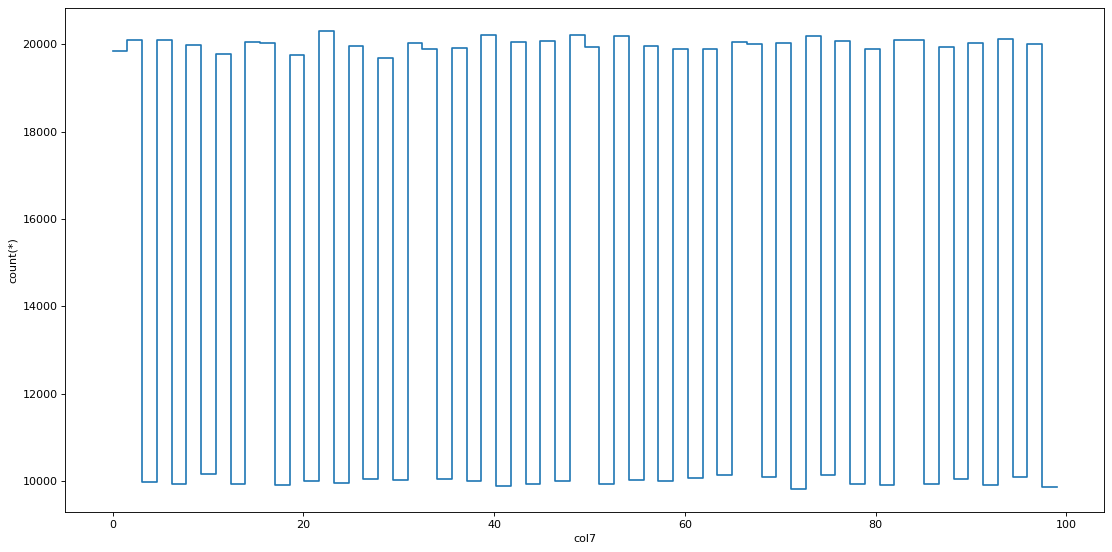

In [14]:
dv.plot1d(dv.col7, figsize=(14, 7))

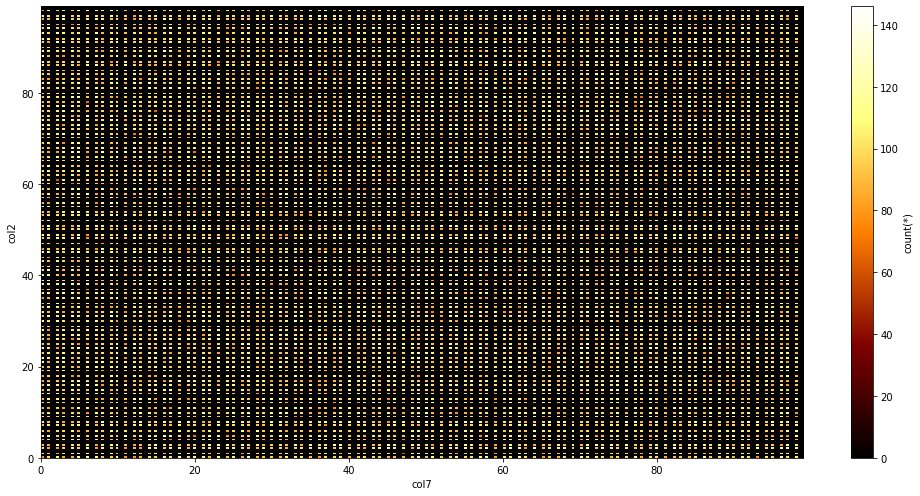

In [17]:
dv.plot(dv.col7, dv.col2, figsize=(14, 7))


### aquí veo esos espacios negros ya que el dataset sólo contiene valores enteros

## HASTA AQUÍ HE PROBADO A:
* construir un dataset de valores enteros aleatorios de casi 4 GB, con 1 millón de filas y 1000 columnas
* guardarlo como csv y luego convertirlo y generar el archivo HDF5
* plotearlo 

## NEXT:
* compararlo con Dask, PySpark
* aplicarlom a dataset real gordo

In [23]:
import numpy as numpy
a_ = np.array([[1, 4, 4, 7, 6, 8]])
a_

array([[1, 4, 4, 7, 6, 8]])

In [24]:
import pandas 

a_.shape

(1, 6)